# GARCH 모델을 활용한 테슬라 변동성 예측 프로그램

In [2]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.2 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      6,   Neg. LLF: 7739857.603356086
Iteration:      2,   Func. Count:     17,   Neg. LLF: 677.3243604565537
Iteration:      3,   Func. Count:     26,   Neg. LLF: -925.802103686262
Iteration:      4,   Func. Count:     35,   Neg. LLF: -873.119441835832
Iteration:      5,   Func. Count:     41,   Neg. LLF: -933.1926815078177
Iteration:      6,   Func. Count:     47,   Neg. LLF: -926.3594990349479
Iteration:      7,   Func. Count:     53,   Neg. LLF: -935.1052224460002
Iteration:      8,   Func. Count:     58,   Neg. LLF: -935.1172936927528
Iteration:      9,   Func. Count:     63,   Neg. LLF: -935.1190004222804
Iteration:     10,   Func. Count:     68,   Neg. LLF: -935.1192765798778
Iteration:     11,   Func. Count:     73,   Neg. LLF: -935.1193004311624
Iteration:     12,   Func. Count:     77,   Neg. LLF: -935.1193004301263
Optimization terminated successfully    (Exit mode 0)
            Current function value: -935.1193004311624
            Iterati

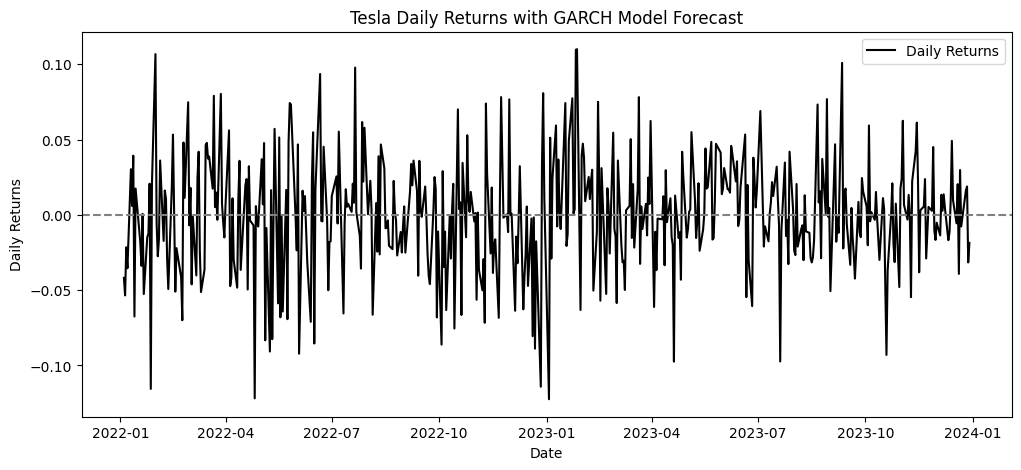

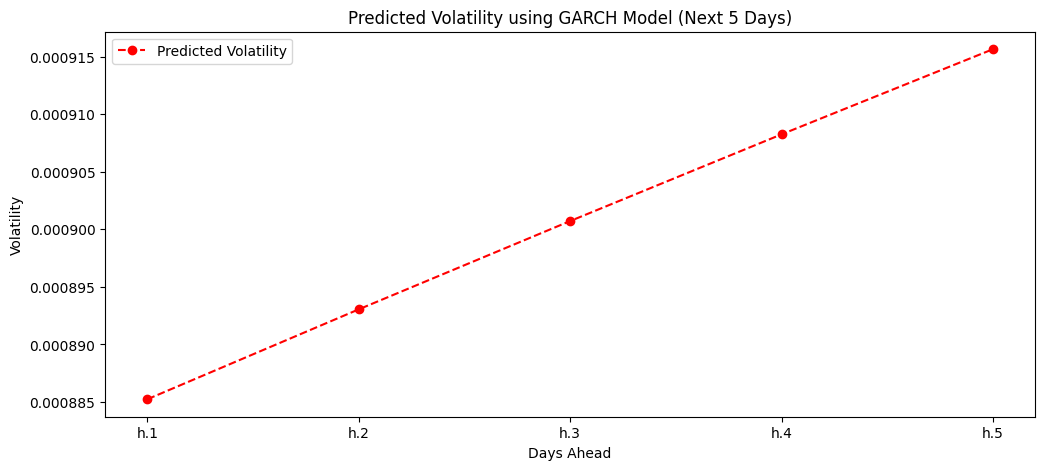

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ 수익률(Returns) 계산
df["Returns"] = df["Close"].pct_change().dropna()  # 로그 수익률 대신 단순 수익률 사용

# 📌 3️⃣ GARCH(1,1) 모델 학습
model = arch_model(df["Returns"].dropna(), vol="Garch", p=1, q=1, rescale=False)
model_fit = model.fit()

# 📌 4️⃣ 변동성 예측 (5일 후)
forecast = model_fit.forecast(horizon=5)  # 5일 후 변동성 예측
predicted_volatility = np.sqrt(forecast.variance.iloc[-1])  # 예측된 변동성

print(f"📌 예측된 변동성 (5일 후): {predicted_volatility.values}")

# 📌 5️⃣ 변동성 시각화
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Returns"], label="Daily Returns", color="black")
plt.axhline(y=0, color='gray', linestyle="--")
plt.title("Tesla Daily Returns with GARCH Model Forecast")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.legend()
plt.show()

# 📌 6️⃣ 예측된 변동성 시각화
plt.figure(figsize=(12, 5))
plt.plot(forecast.variance.iloc[-1], marker="o", linestyle="--", color="red", label="Predicted Volatility")
plt.title("Predicted Volatility using GARCH Model (Next 5 Days)")
plt.xlabel("Days Ahead")
plt.ylabel("Volatility")
plt.legend()
plt.show()
